# Intro to PySpark


## What is Spark, anyway?

Spark is a platform for cluster computing. Spark lets you spread data and computations over clusters with multiple nodes (think of each node as a separate computer). Splitting up your data makes it easier to work with very large datasets because each node only works with a small amount of data.

As each node works on its own subset of the total data, it also carries out a part of the total calculations required, so that both data processing and computation are performed in parallel over the nodes in the cluster. It is a fact that parallel computation can make certain types of programming tasks much faster.

However, with greater computing power comes greater complexity.

Deciding whether or not Spark is the best solution for your problem takes some experience, but you can consider questions like:

Is my data too big to work with on a single machine?
Can my calculations be easily parallelized?
Are you excited to learn more about Spark?

## Using Spark in Python

The first step in using Spark is connecting to a cluster.

In practice, the cluster will be hosted on a remote machine that's connected to all other nodes. There will be one computer, called the master that manages splitting up the data and the computations. The master is connected to the rest of the computers in the cluster, which are called worker. The master sends the workers data and calculations to run, and they send their results back to the master.

When you're just getting started with Spark it's simpler to just run a cluster locally. Thus, for this course, instead of connecting to another computer, all computations will be run on DataCamp's servers in a simulated cluster.

Creating the connection is as simple as creating an instance of the SparkContext class. The class constructor takes a few optional arguments that allow you to specify the attributes of the cluster you're connecting to.

An object holding all these attributes can be created with the SparkConf() constructor. Take a look at the documentation for all the details!

For the rest of this course you'll have a SparkContext called sc already available in your workspace.

## Using DataFrames

park's core data structure is the Resilient Distributed Dataset (RDD). This is a low level object that lets Spark work its magic by splitting data across multiple nodes in the cluster. However, RDDs are hard to work with directly, so in this course you'll be using the Spark DataFrame abstraction built on top of RDDs.

The Spark DataFrame was designed to behave a lot like a SQL table (a table with variables in the columns and observations in the rows). Not only are they easier to understand, DataFrames are also more optimized for complicated operations than RDDs.

When you start modifying and combining columns and rows of data, there are many ways to arrive at the same result, but some often take much longer than others. When using RDDs, it's up to the data scientist to figure out the right way to optimize the query, but the DataFrame implementation has much of this optimization built in!

To start working with Spark DataFrames, you first have to create a SparkSession object from your SparkContext. You can think of the SparkContext as your connection to the cluster and the SparkSession as your interface with that connection.

Remember, for the rest of this course you'll have a SparkSession called spark available in your workspace!

In [1]:
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession
import pandas as pd

# Create my_spark
spark = SparkSession.builder.getOrCreate()

# Print my_spark
print(spark)
print(spark.catalog.listTables())

23/10/04 20:16:05 WARN Utils: Your hostname, sergio-Lenovo-Y520-15IKBN resolves to a loopback address: 127.0.1.1; using 192.168.1.17 instead (on interface wlp3s0)
23/10/04 20:16:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/04 20:16:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


[]


In [2]:
df=spark.read.option("delimiter", ",").option("header", True).csv("Fligths.csv")
df.createOrReplaceTempView("flights")
# Don't change this query
query = "FROM flights SELECT * LIMIT 10"

# Get the first 10 rows of flights
flights10 = spark.sql(query)

# Show the results
flights10.show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|   658.0|     -7.0|   935.0|     -5.0|     VX| N846VA|  1780|   SEA| LAX|   132.0|     954| 6.0|  58.0|
|2014|    1| 22|  1040.0|      5.0|  1505.0|      5.0|     AS| N559AS|   851|   SEA| HNL|   360.0|    2677|10.0|  40.0|
|2014|    3|  9|  1443.0|     -2.0|  1652.0|      2.0|     VX| N847VA|   755|   SEA| SFO|   111.0|     679|14.0|  43.0|
|2014|    4|  9|  1705.0|     45.0|  1839.0|     34.0|     WN| N360SW|   344|   PDX| SJC|    83.0|     569|17.0|   5.0|
|2014|    3|  9|   754.0|     -1.0|  1015.0|      1.0|     AS| N612AS|   522|   SEA| BUR|   127.0|     937| 7.0|  54.0|
|2014|    1| 15|  1037.0|      7.0|  135

In [3]:
# Don't change this query
query = "SELECT origin, dest, COUNT(*) as N FROM flights GROUP BY origin, dest"

# Run the query
flight_counts = spark.sql(query)

# Convert the results to a pandas DataFrame
pd_counts = flight_counts.toPandas()

# Print the head of pd_counts
print(pd_counts.head())

  origin dest    N
0    SEA  RNO    8
1    SEA  DTW   98
2    SEA  CLE    2
3    SEA  LAX  450
4    PDX  SEA  144


### Put some Spark in your data

In the last exercise, you saw how to move data from Spark to pandas. However, maybe you want to go the other direction, and put a pandas DataFrame into a Spark cluster! The SparkSession class has a method for this as well.

The .createDataFrame() method takes a pandas DataFrame and returns a Spark DataFrame.

The output of this method is stored locally, not in the SparkSession catalog. This means that you can use all the Spark DataFrame methods on it, but you can't access the data in other contexts.

For example, a SQL query (using the .sql() method) that references your DataFrame will throw an error. To access the data in this way, you have to save it as a temporary table.

You can do this using the .createTempView() Spark DataFrame method, which takes as its only argument the name of the temporary table you'd like to register. This method registers the DataFrame as a table in the catalog, but as this table is temporary, it can only be accessed from the specific SparkSession used to create the Spark DataFrame.

There is also the method .createOrReplaceTempView(). This safely creates a new temporary table if nothing was there before, or updates an existing table if one was already defined. You'll use this method to avoid running into problems with duplicate tables.

Check out the diagram to see all the different ways your Spark data structures interact with each other.

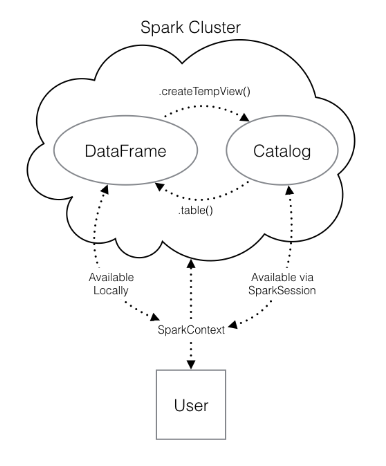

In [4]:
import numpy as np 
# Create pd_temp
pd_temp = pd.DataFrame(np.random.random(10))

# Create spark_temp from pd_temp
spark_temp = spark.createDataFrame(pd_temp)

# Examine the tables in the catalog
print(spark.catalog.listTables())

# Add spark_temp to the catalog
spark_temp.createOrReplaceTempView("temp")

# Examine the tables in the catalog again
print(spark.catalog.listTables())

[Table(name='flights', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]
[Table(name='flights', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]


In [5]:
# Don't change this file path
file_path = "airports.csv"

# Read in the airports data
airports = spark.read.csv(file_path, header=True)

# Show the data
airports.show()

+---+--------------------+----------------+-----------------+----+---+---+
|faa|                name|             lat|              lon| alt| tz|dst|
+---+--------------------+----------------+-----------------+----+---+---+
|04G|   Lansdowne Airport|      41.1304722|      -80.6195833|1044| -5|  A|
|06A|Moton Field Munic...|      32.4605722|      -85.6800278| 264| -5|  A|
|06C| Schaumburg Regional|      41.9893408|      -88.1012428| 801| -6|  A|
|06N|     Randall Airport|       41.431912|      -74.3915611| 523| -5|  A|
|09J|Jekyll Island Air...|      31.0744722|      -81.4277778|  11| -4|  A|
|0A9|Elizabethton Muni...|      36.3712222|      -82.1734167|1593| -4|  A|
|0G6|Williams County A...|      41.4673056|      -84.5067778| 730| -5|  A|
|0G7|Finger Lakes Regi...|      42.8835647|      -76.7812318| 492| -5|  A|
|0P2|Shoestring Aviati...|      39.7948244|      -76.6471914|1000| -5|  U|
|0S9|Jefferson County ...|      48.0538086|     -122.8106436| 108| -8|  A|
|0W3|Harford County Ai...

## Manipulating Data

## Creating columns

In this chapter, you'll learn how to use the methods defined by Spark's DataFrame class to perform common data operations.

Let's look at performing column-wise operations. In Spark you can do this using the .withColumn() method, which takes two arguments. First, a string with the name of your new column, and second the new column itself.

The new column must be an object of class Column. Creating one of these is as easy as extracting a column from your DataFrame using df.colName.

Updating a Spark DataFrame is somewhat different than working in pandas because the Spark DataFrame is immutable. This means that it can't be changed, and so columns can't be updated in place.

Thus, all these methods return a new DataFrame. To overwrite the original DataFrame you must reassign the returned DataFrame using the method like so:

df = df.withColumn("newCol", df.oldCol + 1)

The above code creates a DataFrame with the same columns as df plus a new column, newCol, where every entry is equal to the corresponding entry from oldCol, plus one.

To overwrite an existing column, just pass the name of the column as the first argument!

Remember, a SparkSession called spark is already in your workspace.

In [6]:
# Create the DataFrame flights
flights = spark.table("flights")

# Show the head
flights.show()

# Add duration_hrs
flights = flights.withColumn("duration_hrs",flights.air_time/60)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|   658.0|     -7.0|   935.0|     -5.0|     VX| N846VA|  1780|   SEA| LAX|   132.0|     954| 6.0|  58.0|
|2014|    1| 22|  1040.0|      5.0|  1505.0|      5.0|     AS| N559AS|   851|   SEA| HNL|   360.0|    2677|10.0|  40.0|
|2014|    3|  9|  1443.0|     -2.0|  1652.0|      2.0|     VX| N847VA|   755|   SEA| SFO|   111.0|     679|14.0|  43.0|
|2014|    4|  9|  1705.0|     45.0|  1839.0|     34.0|     WN| N360SW|   344|   PDX| SJC|    83.0|     569|17.0|   5.0|
|2014|    3|  9|   754.0|     -1.0|  1015.0|      1.0|     AS| N612AS|   522|   SEA| BUR|   127.0|     937| 7.0|  54.0|
|2014|    1| 15|  1037.0|      7.0|  135

In [7]:
flights.show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+------------------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|      duration_hrs|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+------------------+
|2014|   12|  8|   658.0|     -7.0|   935.0|     -5.0|     VX| N846VA|  1780|   SEA| LAX|   132.0|     954| 6.0|  58.0|               2.2|
|2014|    1| 22|  1040.0|      5.0|  1505.0|      5.0|     AS| N559AS|   851|   SEA| HNL|   360.0|    2677|10.0|  40.0|               6.0|
|2014|    3|  9|  1443.0|     -2.0|  1652.0|      2.0|     VX| N847VA|   755|   SEA| SFO|   111.0|     679|14.0|  43.0|              1.85|
|2014|    4|  9|  1705.0|     45.0|  1839.0|     34.0|     WN| N360SW|   344|   PDX| SJC|    83.0|     569|17.0|   5.0|1.3833333333333333|
|2014|    3|  9|   754.0|  

## Filtering Data
Now that you have a bit of SQL know-how under your belt, it's easier to talk about the analogous operations using Spark DataFrames.

Let's take a look at the .filter() method. As you might suspect, this is the Spark counterpart of SQL's WHERE clause. The .filter() method takes either an expression that would follow the WHERE clause of a SQL expression as a string, or a Spark Column of boolean (True/False) values.

For example, the following two expressions will produce the same output:

flights.filter("air_time > 120").show()
```flights.filter(flights.air_time > 120).show()```

In [8]:
# Filter flights by passing a string
long_flights1 = flights.filter("distance > 1000")

# Filter flights by passing a column of boolean values
long_flights2 = flights.filter(flights.distance > 1000)

# Print the data to check they're equal
long_flights1.show()
long_flights2.show()


+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+------------------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|      duration_hrs|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+------------------+
|2014|    1| 22|  1040.0|      5.0|  1505.0|      5.0|     AS| N559AS|   851|   SEA| HNL|   360.0|    2677|10.0|  40.0|               6.0|
|2014|    4| 19|  1236.0|     -4.0|  1508.0|     -7.0|     AS| N309AS|   490|   SEA| SAN|   135.0|    1050|12.0|  36.0|              2.25|
|2014|   11| 19|  1812.0|     -3.0|  2352.0|     -4.0|     AS| N564AS|    26|   SEA| ORD|   198.0|    1721|18.0|  12.0|               3.3|
|2014|    8|  3|  1120.0|      0.0|  1415.0|      2.0|     AS| N305AS|   656|   SEA| PHX|   154.0|    1107|11.0|  20.0| 2.566666666666667|
|2014|   11| 12|  2346.0|  

## Selecting

The Spark variant of SQL's SELECT is the .select() method. This method takes multiple arguments - one for each column you want to select. These arguments can either be the column name as a string (one for each column) or a column object (using the df.colName syntax). When you pass a column object, you can perform operations like addition or subtraction on the column to change the data contained in it, much like inside .withColumn().

The difference between .select() and .withColumn() methods is that .select() returns only the columns you specify, while .withColumn() returns all the columns of the DataFrame in addition to the one you defined. It's often a good idea to drop columns you don't need at the beginning of an operation so that you're not dragging around extra data as you're wrangling. In this case, you would use .select() and not .withColumn().

In [9]:
# Select the first set of columns
selected1 = flights.select("tailnum", "origin", "dest")

# Select the second set of columns
temp = flights.select(flights.origin, flights.dest, flights.carrier)

# Define first filter
filterA = flights.origin == "SEA"

# Define second filter
filterB = flights.dest == "PDX"

# Filter the data, first by filterA then by filterB
selected2 = temp.filter(filterA).filter(filterB)

selected2.show()

+------+----+-------+
|origin|dest|carrier|
+------+----+-------+
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     AS|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     AS|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
+------+----+-------+
only showing top 20 rows



## Selecting II

Similar to SQL, you can also use the .select() method to perform column-wise operations. When you're selecting a column using the df.colName notation, you can perform any column operation and the .select() method will return the transformed column. For example,

```flights.select(flights.air_time/60)```

returns a column of flight durations in hours instead of minutes. You can also use the .alias() method to rename a column you're selecting. So if you wanted to .select() the column duration_hrs (which isn't in your DataFrame) you could do

```flights.select((flights.air_time/60).alias("duration_hrs"))```

The equivalent Spark DataFrame method .selectExpr() takes SQL expressions as a string:

```flights.selectExpr("air_time/60 as duration_hrs")```

with the SQL as keyword being equivalent to the .alias() method. To select multiple columns, you can pass multiple strings.

In [10]:
# Define avg_speed
avg_speed = (flights.distance/(flights.air_time/60)).alias("avg_speed")

# Select the correct columns
speed1 = flights.select("origin", "dest", "tailnum", avg_speed)

# Create the same table using a SQL expression
speed2 = flights.selectExpr("origin", "dest", "tailnum", "distance/(air_time/60) as avg_speed")

## Aggregating

All of the common aggregation methods, like .min(), .max(), and .count() are GroupedData methods. These are created by calling the .groupBy() DataFrame method. You'll learn exactly what that means in a few exercises. For now, all you have to do to use these functions is call that method on your DataFrame. For example, to find the minimum value of a column, col, in a DataFrame, df, you could do

```df.groupBy().min("col").show()```

This creates a GroupedData object (so you can use the .min() method), then finds the minimum value in col, and returns it as a DataFrame.

In [11]:
flights.describe()

DataFrame[summary: string, year: string, month: string, day: string, dep_time: string, dep_delay: string, arr_time: string, arr_delay: string, carrier: string, tailnum: string, flight: string, origin: string, dest: string, air_time: string, distance: string, hour: string, minute: string, duration_hrs: string]

In [12]:

flights = flights.withColumn("distance", flights.distance.cast("float"))

flights = flights.withColumn("air_time", flights.air_time.cast("float"))

flights = flights.withColumn("dep_delay", flights.air_time.cast("float"))

In [13]:
flights.describe('air_time', 'distance').show()

+-------+------------------+-----------------+
|summary|          air_time|         distance|
+-------+------------------+-----------------+
|  count|              9925|            10000|
|   mean|152.88423173803525|        1208.1516|
| stddev|  72.8656286392139|656.8599023464376|
|    min|              20.0|             93.0|
|    max|             409.0|           2724.0|
+-------+------------------+-----------------+



In [14]:
# Find the shortest flight from PDX in terms of distance
flights.filter(flights.origin == "PDX").groupBy().min("distance").show()

# Find the longest flight from SEA in terms of air time
flights.filter(flights.origin == "SEA").groupBy().max("air_time").show()

+-------------+
|min(distance)|
+-------------+
|        106.0|
+-------------+

+-------------+
|max(air_time)|
+-------------+
|        409.0|
+-------------+



In [15]:
# Average duration of Delta flights
flights.filter(flights.carrier == "DL").filter(flights.origin == "SEA").groupBy().avg("air_time").show()

# Total hours in the air
flights.withColumn("duration_hrs", flights.air_time/60).groupBy().sum("duration_hrs").show()

+------------------+
|     avg(air_time)|
+------------------+
|188.20689655172413|
+------------------+

+------------------+
| sum(duration_hrs)|
+------------------+
|25289.600000000126|
+------------------+



## Grouping and Aggregating I

In [16]:
# Group by tailnum
by_plane = flights.groupBy("tailnum")

# Number of flights each plane made
by_plane.count().show()

# Group by origin
by_origin = flights.groupBy("origin")

# Average duration of flights from PDX and SEA
by_origin.avg("air_time").show()

+-------+-----+
|tailnum|count|
+-------+-----+
| N442AS|   38|
| N102UW|    2|
| N36472|    4|
| N38451|    4|
| N73283|    4|
| N513UA|    2|
| N954WN|    5|
| N388DA|    3|
| N567AA|    1|
| N516UA|    2|
| N927DN|    1|
| N8322X|    1|
| N466SW|    1|
|  N6700|    1|
| N607AS|   45|
| N622SW|    4|
| N584AS|   31|
| N914WN|    4|
| N654AW|    2|
| N336NW|    1|
+-------+-----+
only showing top 20 rows

+------+------------------+
|origin|     avg(air_time)|
+------+------------------+
|   SEA| 160.4361496051259|
|   PDX|137.11543248288737|
+------+------------------+



In [17]:
# Import pyspark.sql.functions as F
import pyspark.sql.functions as F

# Group by month and dest
by_month_dest = flights.groupBy("month","dest")

# Average departure delay by month and destination
by_month_dest.avg("dep_delay").show()

# Standard deviation of departure delay
by_month_dest.agg(F.stddev("dep_delay")).show()

+-----+----+------------------+
|month|dest|    avg(dep_delay)|
+-----+----+------------------+
|   11| TUS|140.33333333333334|
|   11| ANC|192.91176470588235|
|    1| BUR|             114.0|
|    1| PDX| 33.84615384615385|
|    6| SBA|            115.25|
|    5| LAX|122.89473684210526|
|   10| DTW|             217.4|
|    6| SIT|             123.0|
|   10| DFW| 193.8181818181818|
|    3| FAI|             198.8|
|   10| SEA|31.733333333333334|
|    2| TUS|132.66666666666666|
|   12| OGG| 340.8181818181818|
|    9| DFW|195.16666666666666|
|    5| EWR| 285.0833333333333|
|    3| RDM|              29.2|
|    8| DCA|             278.1|
|    7| ATL|247.54054054054055|
|    4| JFK|276.61538461538464|
|   10| SNA|             131.4|
+-----+----+------------------+
only showing top 20 rows

+-----+----+------------------+
|month|dest| stddev(dep_delay)|
+-----+----+------------------+
|   11| TUS|1.1547005383792517|
|   11| ANC|17.462284287830716|
|    1| BUR|7.8337999114498444|
|    1| PDX| 3

## Join

In [18]:

airports.createOrReplaceTempView("airports")
airports=spark.table("airports")

# Examine the data
print(airports.show())

# Rename the faa column
airports = airports.withColumnRenamed("faa", "dest")

# Join the DataFrames
flights_with_airports = flights.join(airports,on="dest",how="leftouter")

+---+--------------------+----------------+-----------------+----+---+---+
|faa|                name|             lat|              lon| alt| tz|dst|
+---+--------------------+----------------+-----------------+----+---+---+
|04G|   Lansdowne Airport|      41.1304722|      -80.6195833|1044| -5|  A|
|06A|Moton Field Munic...|      32.4605722|      -85.6800278| 264| -5|  A|
|06C| Schaumburg Regional|      41.9893408|      -88.1012428| 801| -6|  A|
|06N|     Randall Airport|       41.431912|      -74.3915611| 523| -5|  A|
|09J|Jekyll Island Air...|      31.0744722|      -81.4277778|  11| -4|  A|
|0A9|Elizabethton Muni...|      36.3712222|      -82.1734167|1593| -4|  A|
|0G6|Williams County A...|      41.4673056|      -84.5067778| 730| -5|  A|
|0G7|Finger Lakes Regi...|      42.8835647|      -76.7812318| 492| -5|  A|
|0P2|Shoestring Aviati...|      39.7948244|      -76.6471914|1000| -5|  U|
|0S9|Jefferson County ...|      48.0538086|     -122.8106436| 108| -8|  A|
|0W3|Harford County Ai...

In [19]:
# Examine the new DataFrame
print(flights_with_airports.show())

+----+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+--------+--------+----+------+------------------+--------------------+---------+-----------+----+---+---+
|dest|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|air_time|distance|hour|minute|      duration_hrs|                name|      lat|        lon| alt| tz|dst|
+----+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+--------+--------+----+------+------------------+--------------------+---------+-----------+----+---+---+
| LAX|2014|   12|  8|   658.0|    132.0|   935.0|     -5.0|     VX| N846VA|  1780|   SEA|   132.0|   954.0| 6.0|  58.0|               2.2|    Los Angeles Intl|33.942536|-118.408075| 126| -8|  A|
| HNL|2014|    1| 22|  1040.0|    360.0|  1505.0|      5.0|     AS| N559AS|   851|   SEA|   360.0|  2677.0|10.0|  40.0|               6.0|       Honolulu Intl|21.318681|-157.922428|  13|-10|  N|
| SFO|2014|    3|  9|  14

In [20]:
airports.show()

+----+--------------------+----------------+-----------------+----+---+---+
|dest|                name|             lat|              lon| alt| tz|dst|
+----+--------------------+----------------+-----------------+----+---+---+
| 04G|   Lansdowne Airport|      41.1304722|      -80.6195833|1044| -5|  A|
| 06A|Moton Field Munic...|      32.4605722|      -85.6800278| 264| -5|  A|
| 06C| Schaumburg Regional|      41.9893408|      -88.1012428| 801| -6|  A|
| 06N|     Randall Airport|       41.431912|      -74.3915611| 523| -5|  A|
| 09J|Jekyll Island Air...|      31.0744722|      -81.4277778|  11| -4|  A|
| 0A9|Elizabethton Muni...|      36.3712222|      -82.1734167|1593| -4|  A|
| 0G6|Williams County A...|      41.4673056|      -84.5067778| 730| -5|  A|
| 0G7|Finger Lakes Regi...|      42.8835647|      -76.7812318| 492| -5|  A|
| 0P2|Shoestring Aviati...|      39.7948244|      -76.6471914|1000| -5|  U|
| 0S9|Jefferson County ...|      48.0538086|     -122.8106436| 108| -8|  A|
| 0W3|Harfor

## Machine Learning Pipelines


In [21]:
planes=spark.read.csv("planes.csv",header=True)
planes.createOrReplaceTempView("planes")
planes=spark.table("planes")
planes.show()

+-------+------+--------------------+----------------+--------+-------+-----+-----+---------+
|tailnum|  year|                type|    manufacturer|   model|engines|seats|speed|   engine|
+-------+------+--------------------+----------------+--------+-------+-----+-----+---------+
| N102UW|1998.0|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| NULL|Turbo-fan|
| N103US|1999.0|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| NULL|Turbo-fan|
| N104UW|1999.0|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| NULL|Turbo-fan|
| N105UW|1999.0|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| NULL|Turbo-fan|
| N107US|1999.0|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| NULL|Turbo-fan|
| N108UW|1999.0|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| NULL|Turbo-fan|
| N109UW|1999.0|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182| NULL|Turbo-fan|
| N110UW|1999.0|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-2

In [22]:
# Rename year column
planes = planes.withColumnRenamed("year","plane_year")

# Join the DataFrames
model_data = flights.join(planes, on="tailnum", how="leftouter")

In [23]:
# Cast the columns to integers
model_data = model_data.withColumn("arr_delay", model_data.arr_delay.cast("integer"))
model_data = model_data.withColumn("air_time", model_data.air_time.cast("integer"))
model_data = model_data.withColumn("month", model_data.month.cast("integer"))
model_data = model_data.withColumn("plane_year", model_data.plane_year.cast("integer"))

In [24]:
# Create the column plane_age
model_data = model_data.withColumn("plane_age", model_data.year - model_data.plane_year)

In [25]:
# Create is_late
model_data = model_data.withColumn("is_late", model_data.arr_delay > 0)

# Convert to an integer
model_data = model_data.withColumn("label", model_data.is_late.cast("integer"))

# Remove missing values
model_data = model_data.filter("arr_delay is not NULL and dep_delay is not NULL and air_time is not NULL and plane_year is not NULL")

In [26]:
model_data.show()

23/10/04 20:16:24 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+------------------+----------+--------------------+--------------+-----------+-------+-----+-----+---------+---------+-------+-----+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|      duration_hrs|plane_year|                type|  manufacturer|      model|engines|seats|speed|   engine|plane_age|is_late|label|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+------------------+----------+--------------------+--------------+-----------+-------+-----+-----+---------+---------+-------+-----+
| N846VA|2014|   12|  8|   658.0|    132.0|   935.0|       -5|     VX|  1780|   SEA| LAX|     132|   954.0| 6.0|  58.0|               2.2|      2011|Fixed wing multi ...|        AIRBUS|   A320-214|      2|  182| NULL|Turbo-fan|      3.0|  false

## Strings and factors



As you know, Spark requires numeric data for modeling. So far this hasn't been an issue; even boolean columns can easily be converted to integers without any trouble. But you'll also be using the airline and the plane's destination as features in your model. These are coded as strings and there isn't any obvious way to convert them to a numeric data type.

Fortunately, PySpark has functions for handling this built into the pyspark.ml.features submodule. You can create what are called 'one-hot vectors' to represent the carrier and the destination of each flight. A one-hot vector is a way of representing a categorical feature where every observation has a vector in which all elements are zero except for at most one element, which has a value of one (1).

Each element in the vector corresponds to a level of the feature, so it's possible to tell what the right level is by seeing which element of the vector is equal to one (1).

The first step to encoding your categorical feature is to create a StringIndexer. Members of this class are Estimators that take a DataFrame with a column of strings and map each unique string to a number. Then, the Estimator returns a Transformer that takes a DataFrame, attaches the mapping to it as metadata, and returns a new DataFrame with a numeric column corresponding to the string column.

The second step is to encode this numeric column as a one-hot vector using a OneHotEncoder. This works exactly the same way as the StringIndexer by creating an Estimator and then a Transformer. The end result is a column that encodes your categorical feature as a vector that's suitable for machine learning routines!

This may seem complicated, but don't worry! All you have to remember is that you need to create a StringIndexer and a OneHotEncoder, and the Pipeline will take care of the rest.

In [27]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler
# Create a StringIndexer
carr_indexer = StringIndexer(inputCol="carrier",outputCol="carrier_index")

# Create a OneHotEncoder
carr_encoder = OneHotEncoder(inputCol="carrier_index",outputCol="carrier_fact")

# Create a StringIndexer
dest_indexer = StringIndexer(inputCol="dest",outputCol="dest_index")

# Create a OneHotEncoder
dest_encoder = OneHotEncoder(inputCol="dest_index",outputCol="dest_fact")

### Assemble a vector
The last step in the Pipeline is to combine all of the columns containing our features into a single column. This has to be done before modeling can take place because every Spark modeling routine expects the data to be in this form. You can do this by storing each of the values from a column as an entry in a vector. Then, from the model's point of view, every observation is a vector that contains all of the information about it and a label that tells the modeler what value that observation corresponds to.

In [28]:
# Make a VectorAssembler
vec_assembler = VectorAssembler(inputCols=["month", "air_time", "carrier_fact", "dest_fact", "plane_age"], outputCol="features")

### Create the pipeline

In [29]:
# Import Pipeline
from pyspark.ml import Pipeline

# Make the pipeline
flights_pipe = Pipeline(stages=[dest_indexer, dest_encoder, carr_indexer, carr_encoder, vec_assembler])

In [30]:
# Fit and transform the data
piped_data = flights_pipe.fit(model_data).transform(model_data)

In [31]:
piped_data.show()

+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+------------------+----------+--------------------+--------------+-----------+-------+-----+-----+---------+---------+-------+-----+----------+---------------+-------------+--------------+--------------------+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|      duration_hrs|plane_year|                type|  manufacturer|      model|engines|seats|speed|   engine|plane_age|is_late|label|dest_index|      dest_fact|carrier_index|  carrier_fact|            features|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+------------------+----------+--------------------+--------------+-----------+-------+-----+-----+---------+---------+-------+-----+----------+---------------+-------------+--------------+--------------------+
| N846VA|2014

### Split the data

Use the DataFrame method .randomSplit() to split piped_data into two pieces, training with 60% of the data, and test with 40% of the data by passing the list [.6, .4] to the .randomSplit() method.

In [32]:
# Split the data into training and test sets
training, test = piped_data.randomSplit([.6, .4])

In [33]:
import requests
url="https://assets.datacamp.com/production/repositories/1237/datasets/231480a2696c55fde829ce76d936596123f12c0c/planes.csv"
r=requests.get(url)

from io import StringIO

data = StringIO(r.text)
df_ = pd.read_csv(data)

df_.to_csv("planes.csv",index=False)

## logistic regression

The model you'll be fitting in this chapter is called a logistic regression. This model is very similar to a linear regression, but instead of predicting a numeric variable, it predicts the probability (between 0 and 1) of an event.

To use this as a classification algorithm, all you have to do is assign a cutoff point to these probabilities. If the predicted probability is above the cutoff point, you classify that observation as a 'yes' (in this case, the flight being late), if it's below, you classify it as a 'no'!

You'll tune this model by testing different values for several hyperparameters. A hyperparameter is just a value in the model that's not estimated from the data, but rather is supplied by the user to maximize performance. For this course it's not necessary to understand the mathematics behind all of these values - what's important is that you'll try out a few different choices and pick the best one.

In [34]:
# Import LogisticRegression
from pyspark.ml.classification import LogisticRegression

# Create a LogisticRegression Estimator
lr = LogisticRegression()

## Cross validation


In the next few exercises you'll be tuning your logistic regression model using a procedure called k-fold cross validation. This is a method of estimating the model's performance on unseen data (like your test DataFrame).

It works by splitting the training data into a few different partitions. The exact number is up to you, but in this course you'll be using PySpark's default value of three. Once the data is split up, one of the partitions is set aside, and the model is fit to the others. Then the error is measured against the held out partition. This is repeated for each of the partitions, so that every block of data is held out and used as a test set exactly once. Then the error on each of the partitions is averaged. This is called the cross validation error of the model, and is a good estimate of the actual error on the held out data.

You'll be using cross validation to choose the hyperparameters by creating a grid of the possible pairs of values for the two hyperparameters, elasticNetParam and regParam, and using the cross validation error to compare all the different models so you can choose the best one!

In [38]:
# Import the evaluation submodule
import pyspark.ml.evaluation as evals

# Create a BinaryClassificationEvaluator
evaluator = evals.BinaryClassificationEvaluator(metricName="areaUnderROC")

# Import the tuning submodule
import pyspark.ml.tuning as tune

# Create the parameter grid
grid = tune.ParamGridBuilder()

# Add the hyperparameter
grid = grid.addGrid(lr.regParam, np.arange(0, .1, .01))
grid = grid.addGrid(lr.elasticNetParam, [0, 1])

# Build the grid
grid = grid.build()

In [39]:
# Create the CrossValidator
cv = tune.CrossValidator(estimator=lr,
               estimatorParamMaps=grid,
               evaluator=evaluator
               )

In [40]:
# Call lr.fit()
best_lr = lr.fit(training)

# Print best_lr
print(best_lr)

LogisticRegressionModel: uid=LogisticRegression_1728920c7e0b, numClasses=2, numFeatures=81


In [41]:
# Use the model to predict the test set
test_results = best_lr.transform(test)

# Evaluate the predictions
print(evaluator.evaluate(test_results))

0.6966338370331949
